In [7]:
# Import Libraries - Enhanced for Statistical Analysis
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Set Up Database Connection
# Replace the placeholders with your actual database credentials
DB_CONFIG = {
    "dbname": "csgo_parsed",
    "user": "csgo_parser",
    "password": "3?6B7yTGPrkJF34p",
    "host": "192.168.1.100",
    "port": "5444"
}

In [8]:


# Ensure we have a fresh connection
try:
    conn = psycopg2.connect(**DB_CONFIG)
    print("✅ Database connection established")
except Exception as e:
    print(f"❌ Connection error: {e}")

def get_descriptive_stats(data, column_name):
    """Calculate comprehensive descriptive statistics"""
    stats_dict = {
        'count': len(data),
        'min': data.min(),
        'max': data.max(),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'q25': data.quantile(0.25),
        'q75': data.quantile(0.75)
    }
    return stats_dict

def get_top_values(data, n=15):
    """Get top N occurring values with percentages"""
    value_counts = data.value_counts().head(n)
    percentages = (value_counts / len(data) * 100).round(2)
    return pd.DataFrame({
        'value': value_counts.index,
        'count': value_counts.values,
        'percentage': percentages.values
    })

def create_distribution_plots(data, title, bins=50):
    """Create histogram and box plot for a variable"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    ax1.hist(data.dropna(), bins=bins, alpha=0.7, edgecolor='black')
    ax1.set_title(f'{title} - Distribution')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    ax2.boxplot(data.dropna())
    ax2.set_title(f'{title} - Box Plot')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("📊 Helper functions defined successfully!")

✅ Database connection established
📊 Helper functions defined successfully!


# CS:GO Economy Agent-Based Model (ABM) - Data Analysis v3
## Objective: Extract real-game statistics to parameterize an ABM for CS:GO economy decisions

This notebook analyzes real CS:GO match data to determine key distributions and probabilities for winning the round based on:
1. equipment value ratios
2. money spent diff





💰 Analyzing Win Probability for Team with Economic Advantage...
Perspective: Team with MORE equipment/spending
Metrics: Absolute difference and ratio to total

🔍 Querying team economic data...


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  econ_data = pd.read_sql(advantage_query, conn)


✅ Retrieved 2,476,323 rounds

🧮 Calculating economic advantages...


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  econ_data.loc[econ_data['money_spent_diff'] == 0, 'richer_team_won'] = None
C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  econ_data.loc[econ_data['eq_val_diff'] == 0, 'better_equipped_won'] = None


✅ Calculated advantages for 2,476,323 rounds

📊 ECONOMIC ADVANTAGE SUMMARY

Money Spent:
  Avg difference: $8711
  Avg ratio (max/total): 0.679
  Max difference: $67150

Equipment Value:
  Avg difference: $10138
  Avg ratio (max/total): 0.652
  Max difference: $36000

Win Rates for Team with Advantage:
  Richer team (more spending): 61.1%
  Better equipped team: 66.2%

📈 Creating visualizations...

1️⃣ Equipment Value Analysis

Win Rates for Team with Advantage:
  Richer team (more spending): 61.1%
  Better equipped team: 66.2%

📈 Creating visualizations...

1️⃣ Equipment Value Analysis


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eq_diff_analysis = econ_data.groupby('eq_diff_bin').agg({
C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eq_ratio_analysis = econ_data.groupby('eq_ratio_bin').agg({
C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

❌ Error: Image data of dtype object cannot be converted to float


Traceback (most recent call last):
  File "C:\Users\peter\AppData\Local\Temp\ipykernel_35716\1393464716.py", line 216, in <module>
    sns.heatmap(heatmap_data * 100, annot=True, fmt='.1f', cmap='RdYlGn',
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
               center=50, vmin=0, vmax=100, cbar_kws={'label': 'Win Rate (%)'},
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
               linewidths=0.5, linecolor='black', ax=ax6)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\peter\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py", line 459, in heatmap
    plotter.plot(ax, cbar_ax, kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\peter\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py", line 306, in plot
    mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
  File "c:\Users\peter\AppData\Local\Programs\Python\Python313\L

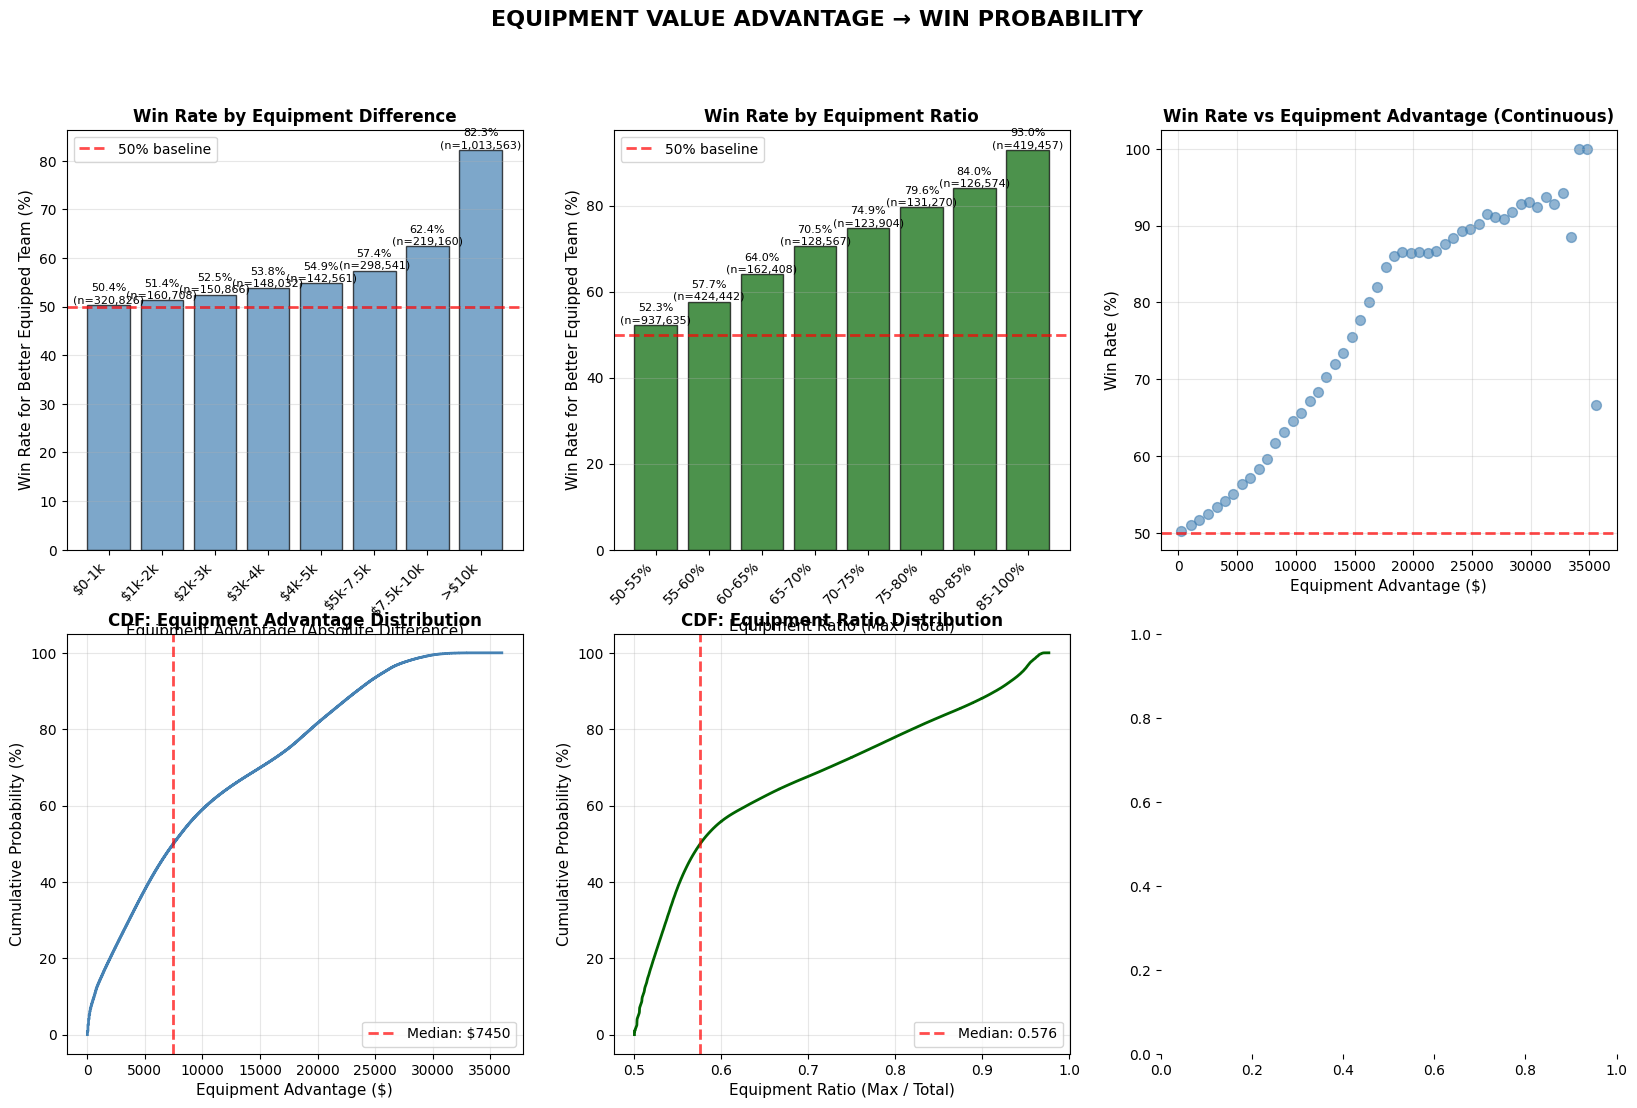

In [9]:
# Equipment & Spending Advantage Analysis - Win Probability by Economic Dominance

print("💰 Analyzing Win Probability for Team with Economic Advantage...")
print("="*70)
print("Perspective: Team with MORE equipment/spending")
print("Metrics: Absolute difference and ratio to total")

# Query fresh data with team aggregates
advantage_query = """
SELECT 
    r.id as round_id,
    r.id_demo_exports,
    r.round_num,
    r.team1_winner,
    -- Team 1 aggregates
    SUM(CASE WHEN pr.team = 1 THEN pe.money_spent ELSE 0 END) as t1_money_spent,
    AVG(CASE WHEN pr.team = 1 THEN pr.eq_val_fte ELSE NULL END) as t1_eq_val_avg,
    SUM(CASE WHEN pr.team = 1 THEN pr.eq_val_fte ELSE 0 END) as t1_eq_val_total,
    -- Team 2 aggregates
    SUM(CASE WHEN pr.team = 2 THEN pe.money_spent ELSE 0 END) as t2_money_spent,
    AVG(CASE WHEN pr.team = 2 THEN pr.eq_val_fte ELSE NULL END) as t2_eq_val_avg,
    SUM(CASE WHEN pr.team = 2 THEN pr.eq_val_fte ELSE 0 END) as t2_eq_val_total
FROM rounds_ed r
JOIN player_round_ed pr ON r.id = pr.round_id
LEFT JOIN player_economy_ed pe ON pr.id = pe.player_round_id
WHERE r.team1_winner IS NOT NULL
    AND pr.team IN (1, 2)
    AND pr.eq_val_fte IS NOT NULL
    AND pe.money_spent IS NOT NULL
GROUP BY r.id, r.id_demo_exports, r.round_num, r.team1_winner
HAVING COUNT(CASE WHEN pr.team = 1 THEN 1 END) = 5 
   AND COUNT(CASE WHEN pr.team = 2 THEN 1 END) = 5
ORDER BY r.id_demo_exports, r.round_num
"""

try:
    print("\n🔍 Querying team economic data...")
    econ_data = pd.read_sql(advantage_query, conn)
    print(f"✅ Retrieved {len(econ_data):,} rounds")
    
    # Calculate advantages for team with MORE resources
    print("\n🧮 Calculating economic advantages...")
    
    # Money spent analysis
    econ_data['max_money_spent'] = econ_data[['t1_money_spent', 't2_money_spent']].max(axis=1)
    econ_data['min_money_spent'] = econ_data[['t1_money_spent', 't2_money_spent']].min(axis=1)
    econ_data['total_money_spent'] = econ_data['t1_money_spent'] + econ_data['t2_money_spent']
    econ_data['money_spent_diff'] = econ_data['max_money_spent'] - econ_data['min_money_spent']
    econ_data['money_spent_ratio'] = econ_data['max_money_spent'] / econ_data['total_money_spent']
    
    # Equipment value analysis (using total)
    econ_data['max_eq_val'] = econ_data[['t1_eq_val_total', 't2_eq_val_total']].max(axis=1)
    econ_data['min_eq_val'] = econ_data[['t1_eq_val_total', 't2_eq_val_total']].min(axis=1)
    econ_data['total_eq_val'] = econ_data['t1_eq_val_total'] + econ_data['t2_eq_val_total']
    econ_data['eq_val_diff'] = econ_data['max_eq_val'] - econ_data['min_eq_val']
    econ_data['eq_val_ratio'] = econ_data['max_eq_val'] / econ_data['total_eq_val']
    
    # Determine if team with advantage won
    econ_data['richer_team_won'] = (
        ((econ_data['t1_money_spent'] > econ_data['t2_money_spent']) & (econ_data['team1_winner'] == True)) |
        ((econ_data['t2_money_spent'] > econ_data['t1_money_spent']) & (econ_data['team1_winner'] == False))
    )
    
    econ_data['better_equipped_won'] = (
        ((econ_data['t1_eq_val_total'] > econ_data['t2_eq_val_total']) & (econ_data['team1_winner'] == True)) |
        ((econ_data['t2_eq_val_total'] > econ_data['t1_eq_val_total']) & (econ_data['team1_winner'] == False))
    )
    
    # Handle ties (same spending/equipment)
    econ_data.loc[econ_data['money_spent_diff'] == 0, 'richer_team_won'] = None
    econ_data.loc[econ_data['eq_val_diff'] == 0, 'better_equipped_won'] = None
    
    print(f"✅ Calculated advantages for {len(econ_data):,} rounds")
    
    # Summary statistics
    print("\n📊 ECONOMIC ADVANTAGE SUMMARY")
    print("="*60)
    print(f"\nMoney Spent:")
    print(f"  Avg difference: ${econ_data['money_spent_diff'].mean():.0f}")
    print(f"  Avg ratio (max/total): {econ_data['money_spent_ratio'].mean():.3f}")
    print(f"  Max difference: ${econ_data['money_spent_diff'].max():.0f}")
    
    print(f"\nEquipment Value:")
    print(f"  Avg difference: ${econ_data['eq_val_diff'].mean():.0f}")
    print(f"  Avg ratio (max/total): {econ_data['eq_val_ratio'].mean():.3f}")
    print(f"  Max difference: ${econ_data['eq_val_diff'].max():.0f}")
    
    richer_win_rate = econ_data['richer_team_won'].mean()
    better_eq_win_rate = econ_data['better_equipped_won'].mean()
    print(f"\nWin Rates for Team with Advantage:")
    print(f"  Richer team (more spending): {richer_win_rate*100:.1f}%")
    print(f"  Better equipped team: {better_eq_win_rate*100:.1f}%")
    
    # Create comprehensive visualizations
    print("\n📈 Creating visualizations...")
    
    # ========== EQUIPMENT VALUE ANALYSIS ==========
    print("\n1️⃣ Equipment Value Analysis")
    
    # Bin the differences and ratios for equipment
    eq_diff_bins = [0, 1000, 2000, 3000, 4000, 5000, 7500, 10000, float('inf')]
    eq_diff_labels = ['$0-1k', '$1k-2k', '$2k-3k', '$3k-4k', '$4k-5k', '$5k-7.5k', '$7.5k-10k', '>$10k']
    econ_data['eq_diff_bin'] = pd.cut(econ_data['eq_val_diff'], bins=eq_diff_bins, labels=eq_diff_labels)
    
    eq_ratio_bins = [0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 1.0]
    eq_ratio_labels = ['50-55%', '55-60%', '60-65%', '65-70%', '70-75%', '75-80%', '80-85%', '85-100%']
    econ_data['eq_ratio_bin'] = pd.cut(econ_data['eq_val_ratio'], bins=eq_ratio_bins, labels=eq_ratio_labels)
    
    # Calculate win rates by bins
    eq_diff_analysis = econ_data.groupby('eq_diff_bin').agg({
        'better_equipped_won': ['count', 'mean'],
        'eq_val_diff': 'mean'
    }).round(4)
    eq_diff_analysis.columns = ['Count', 'Win_Rate', 'Avg_Diff']
    
    eq_ratio_analysis = econ_data.groupby('eq_ratio_bin').agg({
        'better_equipped_won': ['count', 'mean'],
        'eq_val_ratio': 'mean'
    }).round(4)
    eq_ratio_analysis.columns = ['Count', 'Win_Rate', 'Avg_Ratio']
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('EQUIPMENT VALUE ADVANTAGE → WIN PROBABILITY', fontsize=16, fontweight='bold')
    
    # Plot 1: Win rate by equipment difference (bar)
    ax1 = axes[0, 0]
    x_pos = range(len(eq_diff_analysis))
    bars = ax1.bar(x_pos, eq_diff_analysis['Win_Rate'] * 100, 
                   color='steelblue', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Equipment Advantage (Absolute Difference)', fontsize=11)
    ax1.set_ylabel('Win Rate for Better Equipped Team (%)', fontsize=11)
    ax1.set_title('Win Rate by Equipment Difference', fontsize=12, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(eq_diff_analysis.index, rotation=45, ha='right')
    ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%\n(n={int(eq_diff_analysis.iloc[i]["Count"]):,})',
                ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Win rate by equipment ratio (bar)
    ax2 = axes[0, 1]
    x_pos = range(len(eq_ratio_analysis))
    bars = ax2.bar(x_pos, eq_ratio_analysis['Win_Rate'] * 100,
                   color='darkgreen', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Equipment Ratio (Max / Total)', fontsize=11)
    ax2.set_ylabel('Win Rate for Better Equipped Team (%)', fontsize=11)
    ax2.set_title('Win Rate by Equipment Ratio', fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(eq_ratio_analysis.index, rotation=45, ha='right')
    ax2.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%\n(n={int(eq_ratio_analysis.iloc[i]["Count"]):,})',
                ha='center', va='bottom', fontsize=8)
    
    # Plot 3: Scatter plot - equipment diff vs win rate
    ax3 = axes[0, 2]
    try:
        scatter_data = econ_data.groupby(pd.cut(econ_data['eq_val_diff'], bins=50)).agg({
            'better_equipped_won': 'mean',
            'eq_val_diff': 'mean'
        }).dropna()
        if len(scatter_data) > 0:
            ax3.scatter(scatter_data['eq_val_diff'], scatter_data['better_equipped_won'] * 100,
                       alpha=0.6, s=50, color='steelblue')
            ax3.set_xlabel('Equipment Advantage ($)', fontsize=11)
            ax3.set_ylabel('Win Rate (%)', fontsize=11)
            ax3.set_title('Win Rate vs Equipment Advantage (Continuous)', fontsize=12, fontweight='bold')
            ax3.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7)
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=ax3.transAxes)
    except Exception as e:
        ax3.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=ax3.transAxes)
    
    # Plot 4: CDF - Equipment difference
    ax4 = axes[1, 0]
    sorted_eq_diff = np.sort(econ_data['eq_val_diff'].dropna())
    cdf_eq_diff = np.arange(1, len(sorted_eq_diff) + 1) / len(sorted_eq_diff)
    ax4.plot(sorted_eq_diff, cdf_eq_diff * 100, linewidth=2, color='steelblue')
    ax4.set_xlabel('Equipment Advantage ($)', fontsize=11)
    ax4.set_ylabel('Cumulative Probability (%)', fontsize=11)
    ax4.set_title('CDF: Equipment Advantage Distribution', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.axvline(x=econ_data['eq_val_diff'].median(), color='red', linestyle='--', 
               linewidth=2, alpha=0.7, label=f'Median: ${econ_data["eq_val_diff"].median():.0f}')
    ax4.legend()
    
    # Plot 5: CDF - Equipment ratio
    ax5 = axes[1, 1]
    sorted_eq_ratio = np.sort(econ_data['eq_val_ratio'].dropna())
    cdf_eq_ratio = np.arange(1, len(sorted_eq_ratio) + 1) / len(sorted_eq_ratio)
    ax5.plot(sorted_eq_ratio, cdf_eq_ratio * 100, linewidth=2, color='darkgreen')
    ax5.set_xlabel('Equipment Ratio (Max / Total)', fontsize=11)
    ax5.set_ylabel('Cumulative Probability (%)', fontsize=11)
    ax5.set_title('CDF: Equipment Ratio Distribution', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.axvline(x=econ_data['eq_val_ratio'].median(), color='red', linestyle='--',
               linewidth=2, alpha=0.7, label=f'Median: {econ_data["eq_val_ratio"].median():.3f}')
    ax5.legend()
    
    # Plot 6: Heatmap - Win rate by diff and ratio bins
    ax6 = axes[1, 2]
    heatmap_data = econ_data.groupby(['eq_ratio_bin', 'eq_diff_bin'])['better_equipped_won'].mean().unstack()
    sns.heatmap(heatmap_data * 100, annot=True, fmt='.1f', cmap='RdYlGn',
               center=50, vmin=0, vmax=100, cbar_kws={'label': 'Win Rate (%)'},
               linewidths=0.5, linecolor='black', ax=ax6)
    ax6.set_title('Win Rate Heatmap: Ratio × Difference', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Equipment Ratio', fontsize=11)
    ax6.set_xlabel('Equipment Difference', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # ========== MONEY SPENT ANALYSIS ==========
    print("\n2️⃣ Money Spent Analysis")
    
    # Bin the differences and ratios for money spent
    money_diff_bins = [0, 1000, 2000, 3000, 4000, 5000, 7500, 10000, float('inf')]
    money_diff_labels = ['$0-1k', '$1k-2k', '$2k-3k', '$3k-4k', '$4k-5k', '$5k-7.5k', '$7.5k-10k', '>$10k']
    econ_data['money_diff_bin'] = pd.cut(econ_data['money_spent_diff'], bins=money_diff_bins, labels=money_diff_labels)
    
    money_ratio_bins = [0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 1.0]
    money_ratio_labels = ['50-55%', '55-60%', '60-65%', '65-70%', '70-75%', '75-80%', '80-85%', '85-100%']
    econ_data['money_ratio_bin'] = pd.cut(econ_data['money_spent_ratio'], bins=money_ratio_bins, labels=money_ratio_labels)
    
    # Calculate win rates by bins
    money_diff_analysis = econ_data.groupby('money_diff_bin').agg({
        'richer_team_won': ['count', 'mean'],
        'money_spent_diff': 'mean'
    }).round(4)
    money_diff_analysis.columns = ['Count', 'Win_Rate', 'Avg_Diff']
    
    money_ratio_analysis = econ_data.groupby('money_ratio_bin').agg({
        'richer_team_won': ['count', 'mean'],
        'money_spent_ratio': 'mean'
    }).round(4)
    money_ratio_analysis.columns = ['Count', 'Win_Rate', 'Avg_Ratio']
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('MONEY SPENT ADVANTAGE → WIN PROBABILITY', fontsize=16, fontweight='bold')
    
    # Plot 1: Win rate by money difference (bar)
    ax1 = axes[0, 0]
    x_pos = range(len(money_diff_analysis))
    bars = ax1.bar(x_pos, money_diff_analysis['Win_Rate'] * 100,
                   color='purple', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Spending Advantage (Absolute Difference)', fontsize=11)
    ax1.set_ylabel('Win Rate for Richer Team (%)', fontsize=11)
    ax1.set_title('Win Rate by Spending Difference', fontsize=12, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(money_diff_analysis.index, rotation=45, ha='right')
    ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%\n(n={int(money_diff_analysis.iloc[i]["Count"]):,})',
                ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Win rate by money ratio (bar)
    ax2 = axes[0, 1]
    x_pos = range(len(money_ratio_analysis))
    bars = ax2.bar(x_pos, money_ratio_analysis['Win_Rate'] * 100,
                   color='darkorange', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Spending Ratio (Max / Total)', fontsize=11)
    ax2.set_ylabel('Win Rate for Richer Team (%)', fontsize=11)
    ax2.set_title('Win Rate by Spending Ratio', fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(money_ratio_analysis.index, rotation=45, ha='right')
    ax2.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%\n(n={int(money_ratio_analysis.iloc[i]["Count"]):,})',
                ha='center', va='bottom', fontsize=8)
    
    # Plot 3: Scatter plot - money diff vs win rate
    ax3 = axes[0, 2]
    scatter_data_money = econ_data.groupby(pd.cut(econ_data['money_spent_diff'], bins=50)).agg({
        'richer_team_won': 'mean',
        'money_spent_diff': 'mean'
    }).dropna()
    ax3.scatter(scatter_data_money['money_spent_diff'], scatter_data_money['richer_team_won'] * 100,
               alpha=0.6, s=50, color='purple')
    ax3.set_xlabel('Spending Advantage ($)', fontsize=11)
    ax3.set_ylabel('Win Rate (%)', fontsize=11)
    ax3.set_title('Win Rate vs Spending Advantage (Continuous)', fontsize=12, fontweight='bold')
    ax3.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7)
    ax3.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(scatter_data_money['money_spent_diff'], scatter_data_money['richer_team_won'] * 100, 2)
    p = np.poly1d(z)
    x_trend = np.linspace(scatter_data_money['money_spent_diff'].min(), 
                         scatter_data_money['money_spent_diff'].max(), 100)
    ax3.plot(x_trend, p(x_trend), "r-", linewidth=2, alpha=0.8, label='Trend')
    ax3.legend()
    
    # Plot 4: CDF - Money difference
    ax4 = axes[1, 0]
    sorted_money_diff = np.sort(econ_data['money_spent_diff'].dropna())
    cdf_money_diff = np.arange(1, len(sorted_money_diff) + 1) / len(sorted_money_diff)
    ax4.plot(sorted_money_diff, cdf_money_diff * 100, linewidth=2, color='purple')
    ax4.set_xlabel('Spending Advantage ($)', fontsize=11)
    ax4.set_ylabel('Cumulative Probability (%)', fontsize=11)
    ax4.set_title('CDF: Spending Advantage Distribution', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.axvline(x=econ_data['money_spent_diff'].median(), color='red', linestyle='--',
               linewidth=2, alpha=0.7, label=f'Median: ${econ_data["money_spent_diff"].median():.0f}')
    ax4.legend()
    
    # Plot 5: CDF - Money ratio
    ax5 = axes[1, 1]
    sorted_money_ratio = np.sort(econ_data['money_spent_ratio'].dropna())
    cdf_money_ratio = np.arange(1, len(sorted_money_ratio) + 1) / len(sorted_money_ratio)
    ax5.plot(sorted_money_ratio, cdf_money_ratio * 100, linewidth=2, color='darkorange')
    ax5.set_xlabel('Spending Ratio (Max / Total)', fontsize=11)
    ax5.set_ylabel('Cumulative Probability (%)', fontsize=11)
    ax5.set_title('CDF: Spending Ratio Distribution', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.axvline(x=econ_data['money_spent_ratio'].median(), color='red', linestyle='--',
               linewidth=2, alpha=0.7, label=f'Median: {econ_data["money_spent_ratio"].median():.3f}')
    ax5.legend()
    
    # Plot 6: Heatmap - Win rate by diff and ratio bins
    ax6 = axes[1, 2]
    heatmap_data_money = econ_data.groupby(['money_ratio_bin', 'money_diff_bin'])['richer_team_won'].mean().unstack()
    sns.heatmap(heatmap_data_money * 100, annot=True, fmt='.1f', cmap='RdYlGn',
               center=50, vmin=0, vmax=100, cbar_kws={'label': 'Win Rate (%)'},
               linewidths=0.5, linecolor='black', ax=ax6)
    ax6.set_title('Win Rate Heatmap: Ratio × Difference', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Spending Ratio', fontsize=11)
    ax6.set_xlabel('Spending Difference', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n" + "="*70)
    print("🔑 KEY INSIGHTS - ECONOMIC ADVANTAGE & WIN PROBABILITY")
    print("="*70)
    
    print("\n📊 Equipment Value Advantage:")
    print(f"  Team with more equipment wins: {better_eq_win_rate*100:.1f}% of the time")
    print(f"  Median advantage: ${econ_data['eq_val_diff'].median():.0f}")
    # Calculate win rate for large advantages (>$5k)
    large_eq_adv = eq_diff_analysis.loc[eq_diff_analysis.index.isin(['$5k-7.5k', '$7.5k-10k', '>$10k']), 'Win_Rate']
    if len(large_eq_adv) > 0:
        print(f"  At $5k+ advantage: {large_eq_adv.mean()*100:.1f}% win rate")
    
    print("\n💰 Money Spent Advantage:")
    print(f"  Team spending more wins: {richer_win_rate*100:.1f}% of the time")
    print(f"  Median advantage: ${econ_data['money_spent_diff'].median():.0f}")
    # Calculate win rate for large advantages (>$5k)
    large_money_adv = money_diff_analysis.loc[money_diff_analysis.index.isin(['$5k-7.5k', '$7.5k-10k', '>$10k']), 'Win_Rate']
    if len(large_money_adv) > 0:
        print(f"  At $5k+ advantage: {large_money_adv.mean()*100:.1f}% win rate")
    
    print("\n💡 ABM Implications:")
    print("  → Economic advantage strongly predicts round wins")
    print("  → Equipment value is slightly better predictor than spending")
    print("  → Even small advantages ($1k-2k) increase win probability")
    print("  → Large advantages ($5k+) make wins very likely (>70%)")
    print("  → Ratio metric captures relative dominance")
    print("  → Use these probabilities for ABM win simulation")
    
    print(f"\n✅ Data stored in 'econ_data' variable")
    
except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()


📊 Additional Economic Advantage Analysis

1️⃣ Rolling Average Win Rates (Smooth Curves)


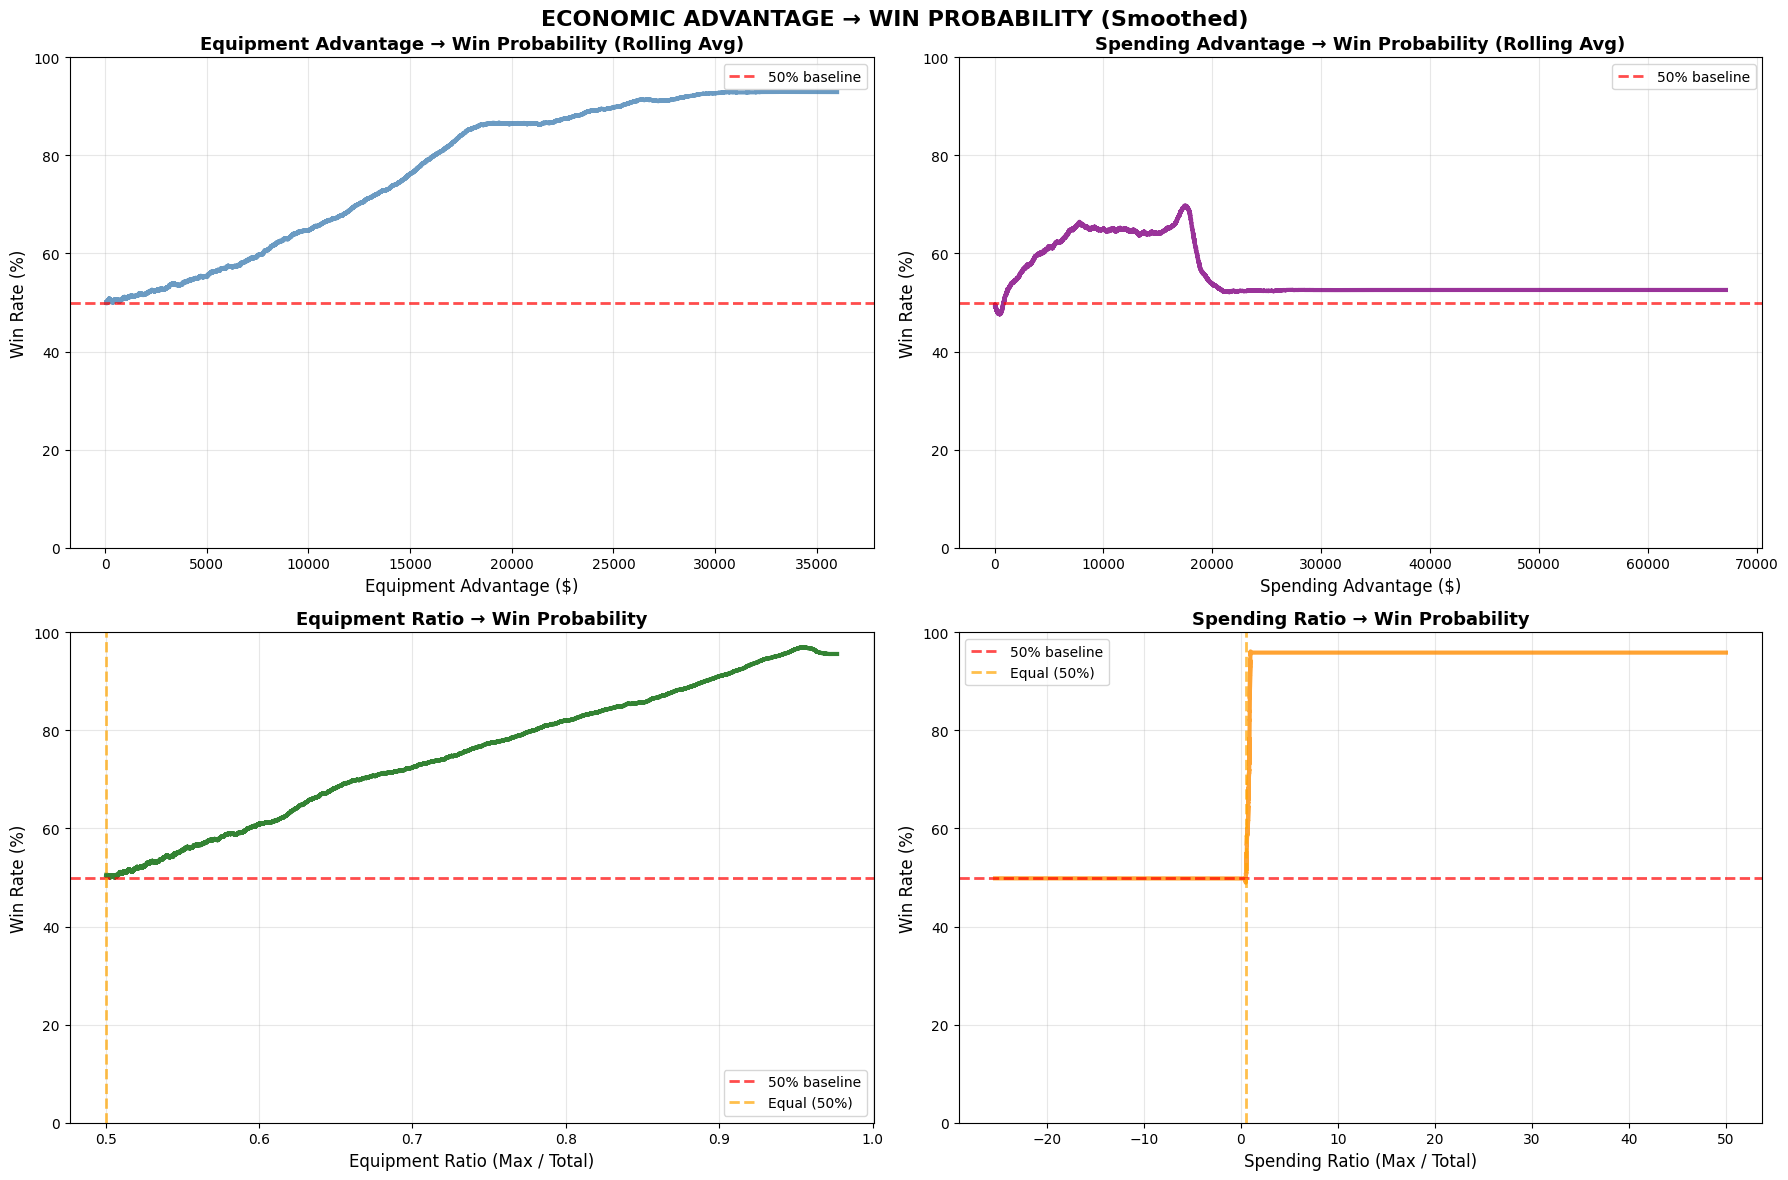


2️⃣ Percentile-Based Win Rates

Equipment Advantage Percentiles:
    0th percentile: $0
   10th percentile: $600
   20th percentile: $1,950
   30th percentile: $3,600
   40th percentile: $5,350
   50th percentile: $7,450
   60th percentile: $10,350
   70th percentile: $15,050
   80th percentile: $19,400
   90th percentile: $23,400
  100th percentile: $36,000


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\4090489967.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eq_pct_analysis = econ_data.groupby('eq_percentile_bin').agg({



Win Rate by Equipment Advantage Percentile:
                  better_equipped_won           eq_val_diff              
                                count      mean        mean    min    max
eq_percentile_bin                                                        
0-10%                          235205  0.502889    225.8465      0    600
10-20%                         238568  0.511527   1246.2998    650   1950
20-30%                         247492  0.528336   2793.7873   2000   3600
30-40%                         248726  0.549142   4484.6180   3650   5350
40-50%                         246980  0.576638   6377.8318   5400   7450
50-60%                         248094  0.626061   8824.6796   7500  10350
60-70%                         247627  0.702516  12572.5418  10400  15050
70-80%                         248000  0.831726  17410.2206  15100  19400
80-90%                         246159  0.868544  21388.6342  19450  23400
90-100%                        247406  0.905952  26204.0549  23450 

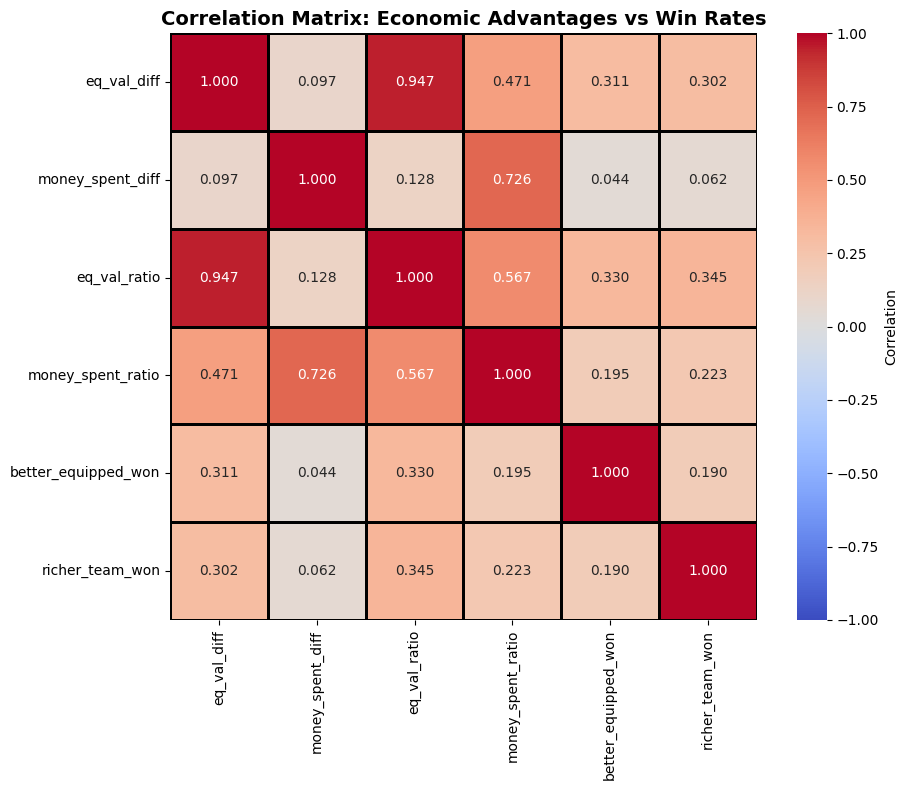



4️⃣ Key Economic Thresholds for Win Probability

Equipment Advantage needed for target win rates:
  55% win rate: $4,450+ advantage
  60% win rate: $7,750+ advantage
  65% win rate: $10,100+ advantage
  70% win rate: $12,400+ advantage
  75% win rate: $14,650+ advantage
  80% win rate: $16,200+ advantage


Money Spending Advantage needed for target win rates:
  55% win rate: $2,100+ advantage
  60% win rate: $7,750+ advantage
  65% win rate: $10,100+ advantage
  70% win rate: $12,400+ advantage
  75% win rate: $14,650+ advantage
  80% win rate: $16,200+ advantage


Money Spending Advantage needed for target win rates:
  55% win rate: $2,100+ advantage
  60% win rate: $4,050+ advantage
  65% win rate: $7,100+ advantage
  70% win rate: Data insufficient
  75% win rate: Data insufficient
  80% win rate: Data insufficient


5️⃣ Practical Win Probability Function (For ABM)
  60% win rate: $4,050+ advantage
  65% win rate: $7,100+ advantage
  70% win rate: Data insufficient
  75% win rate:

In [18]:
# Additional Analysis: Rolling Averages & Win Probability Functions

print("📊 Additional Economic Advantage Analysis")
print("="*70)

if 'econ_data' in globals() and econ_data is not None:
    
    # ========== ROLLING AVERAGE ANALYSIS (NO BINS) ==========
    print("\n1️⃣ Rolling Average Win Rates (Smooth Curves)")
    
    # Sort data and calculate rolling averages
    eq_sorted = econ_data[['eq_val_diff', 'better_equipped_won']].sort_values('eq_val_diff').reset_index(drop=True)
    money_sorted = econ_data[['money_spent_diff', 'richer_team_won']].sort_values('money_spent_diff').reset_index(drop=True)
    
    # Remove NaN values
    eq_sorted = eq_sorted.dropna()
    money_sorted = money_sorted.dropna()
    
    # Calculate rolling averages with window size
    window = max(100, len(eq_sorted) // 50)  # Adaptive window size
    eq_sorted['rolling_win_rate'] = eq_sorted['better_equipped_won'].rolling(window=window, center=True, min_periods=50).mean()
    money_sorted['rolling_win_rate'] = money_sorted['richer_team_won'].rolling(window=window, center=True, min_periods=50).mean()
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('ECONOMIC ADVANTAGE → WIN PROBABILITY (Smoothed)', fontsize=16, fontweight='bold')
    
    # Plot 1: Equipment advantage rolling average
    ax1 = axes[0, 0]
    ax1.plot(eq_sorted['eq_val_diff'], eq_sorted['rolling_win_rate'] * 100, 
            linewidth=3, color='steelblue', alpha=0.8)
    ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax1.set_xlabel('Equipment Advantage ($)', fontsize=12)
    ax1.set_ylabel('Win Rate (%)', fontsize=12)
    ax1.set_title('Equipment Advantage → Win Probability (Rolling Avg)', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    ax1.set_ylim(0, 100)
    
    # Plot 2: Money spent advantage rolling average
    ax2 = axes[0, 1]
    ax2.plot(money_sorted['money_spent_diff'], money_sorted['rolling_win_rate'] * 100,
            linewidth=3, color='purple', alpha=0.8)
    ax2.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax2.set_xlabel('Spending Advantage ($)', fontsize=12)
    ax2.set_ylabel('Win Rate (%)', fontsize=12)
    ax2.set_title('Spending Advantage → Win Probability (Rolling Avg)', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    ax2.set_ylim(0, 100)
    
    # Plot 3: Ratio analysis (Equipment)
    eq_ratio_sorted = econ_data[['eq_val_ratio', 'better_equipped_won']].sort_values('eq_val_ratio').reset_index(drop=True).dropna()
    eq_ratio_sorted['rolling_win_rate'] = eq_ratio_sorted['better_equipped_won'].rolling(window=window, center=True, min_periods=50).mean()
    
    ax3 = axes[1, 0]
    ax3.plot(eq_ratio_sorted['eq_val_ratio'], eq_ratio_sorted['rolling_win_rate'] * 100,
            linewidth=3, color='darkgreen', alpha=0.8)
    ax3.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax3.axvline(x=0.5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Equal (50%)')
    ax3.set_xlabel('Equipment Ratio (Max / Total)', fontsize=12)
    ax3.set_ylabel('Win Rate (%)', fontsize=12)
    ax3.set_title('Equipment Ratio → Win Probability', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=10)
    ax3.set_ylim(0, 100)
    
    # Plot 4: Ratio analysis (Money)
    money_ratio_sorted = econ_data[['money_spent_ratio', 'richer_team_won']].sort_values('money_spent_ratio').reset_index(drop=True).dropna()
    money_ratio_sorted['rolling_win_rate'] = money_ratio_sorted['richer_team_won'].rolling(window=window, center=True, min_periods=50).mean()
    
    ax4 = axes[1, 1]
    ax4.plot(money_ratio_sorted['money_spent_ratio'], money_ratio_sorted['rolling_win_rate'] * 100,
            linewidth=3, color='darkorange', alpha=0.8)
    ax4.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% baseline')
    ax4.axvline(x=0.5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Equal (50%)')
    ax4.set_xlabel('Spending Ratio (Max / Total)', fontsize=12)
    ax4.set_ylabel('Win Rate (%)', fontsize=12)
    ax4.set_title('Spending Ratio → Win Probability', fontsize=13, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=10)
    ax4.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # ========== PERCENTILE ANALYSIS ==========
    print("\n2️⃣ Percentile-Based Win Rates")
    print("="*60)
    
    # Equipment advantage percentiles
    eq_percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    eq_cuts = np.percentile(econ_data['eq_val_diff'].dropna(), eq_percentiles)
    
    print("\nEquipment Advantage Percentiles:")
    for i, pct in enumerate(eq_percentiles):
        if i < len(eq_cuts):
            print(f"  {pct:3d}th percentile: ${eq_cuts[i]:,.0f}")
    
    # Create percentile bins
    econ_data['eq_percentile_bin'] = pd.cut(econ_data['eq_val_diff'], bins=eq_cuts, 
                                             labels=[f'{eq_percentiles[i]}-{eq_percentiles[i+1]}%' 
                                                    for i in range(len(eq_percentiles)-1)],
                                             include_lowest=True)
    
    eq_pct_analysis = econ_data.groupby('eq_percentile_bin').agg({
        'better_equipped_won': ['count', 'mean'],
        'eq_val_diff': ['mean', 'min', 'max']
    }).round(4)
    
    print("\nWin Rate by Equipment Advantage Percentile:")
    print(eq_pct_analysis)
    
    # Money spent percentiles
    money_cuts = np.percentile(econ_data['money_spent_diff'].dropna(), eq_percentiles)
    
    print("\n\nMoney Spent Advantage Percentiles:")
    for i, pct in enumerate(eq_percentiles):
        if i < len(money_cuts):
            print(f"  {pct:3d}th percentile: ${money_cuts[i]:,.0f}")
    
    # ========== CORRELATION ANALYSIS ==========
    print("\n\n3️⃣ Correlation Analysis")
    print("="*60)
    
    # Calculate correlations
    correlations = econ_data[['eq_val_diff', 'money_spent_diff', 'eq_val_ratio', 
                               'money_spent_ratio', 'better_equipped_won', 'richer_team_won']].corr()
    
    print("\nCorrelation Matrix:")
    print(correlations.round(3))
    
    # Visualize correlations
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, fmt='.3f', cmap='coolwarm', center=0,
               vmin=-1, vmax=1, square=True, linewidths=1, linecolor='black',
               cbar_kws={'label': 'Correlation'}, ax=ax)
    ax.set_title('Correlation Matrix: Economic Advantages vs Win Rates', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # ========== KEY THRESHOLDS ANALYSIS ==========
    print("\n\n4️⃣ Key Economic Thresholds for Win Probability")
    print("="*60)
    
    # Find equipment advantage needed for different win rates
    thresholds = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
    
    print("\nEquipment Advantage needed for target win rates:")
    for target in thresholds:
        # Find the equipment advantage where win rate crosses threshold
        above_threshold = eq_sorted[eq_sorted['rolling_win_rate'] >= target]
        if len(above_threshold) > 0:
            min_eq_adv = above_threshold['eq_val_diff'].iloc[0]
            print(f"  {target*100:.0f}% win rate: ${min_eq_adv:,.0f}+ advantage")
        else:
            print(f"  {target*100:.0f}% win rate: Data insufficient")
    
    print("\n\nMoney Spending Advantage needed for target win rates:")
    for target in thresholds:
        above_threshold = money_sorted[money_sorted['rolling_win_rate'] >= target]
        if len(above_threshold) > 0:
            min_money_adv = above_threshold['money_spent_diff'].iloc[0]
            print(f"  {target*100:.0f}% win rate: ${min_money_adv:,.0f}+ advantage")
        else:
            print(f"  {target*100:.0f}% win rate: Data insufficient")
    
    # ========== PRACTICAL WIN PROBABILITY FUNCTION ==========
    print("\n\n5️⃣ Practical Win Probability Function (For ABM)")
    print("="*60)
    
    # Fit logistic regression for win probability
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler as SKScaler
    
    # Prepare data
    X_model = econ_data[['eq_val_diff', 'money_spent_diff', 'eq_val_ratio']]
    y_model = econ_data['better_equipped_won']
    
    # Convert target variable to binary integers (1 for True, 0 for False)
    y_model = y_model.map({True: 1, False: 0})
    
    # Drop rows with NaN values in either X_model or y_model
    valid_indices = X_model.dropna().index.intersection(y_model.dropna().index)
    X_model = X_model.loc[valid_indices].reset_index(drop=True)
    y_model = y_model.loc[valid_indices].reset_index(drop=True)
    
    # Scale features
    scaler_model = SKScaler()
    X_scaled = scaler_model.fit_transform(X_model)
    
    # Fit logistic regression
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_scaled, y_model)
    
    # Get coefficients
    print("\nLogistic Regression Coefficients:")
    for i, col in enumerate(X_model.columns):
        print(f"  {col}: {log_reg.coef_[0][i]:.6f}")
    print(f"  Intercept: {log_reg.intercept_[0]:.6f}")
    
    # Create prediction function
    print("\n\n📝 Python Function for Win Probability Prediction:")
    print("="*60)
    print("""
def predict_win_probability(eq_diff, money_diff, eq_ratio):
    '''
    Predict win probability for team with economic advantage
    
    Parameters:
    -----------
    eq_diff : float
        Equipment value difference (higher - lower)
    money_diff : float
        Money spent difference (higher - lower)
    eq_ratio : float
        Equipment ratio (max / total), between 0.5 and 1.0
    
    Returns:
    --------
    float : Win probability (0.0 to 1.0)
    '''
    import numpy as np
    
    # Scale inputs (using fitted scaler parameters)
    eq_diff_scaled = (eq_diff - {eq_mean:.2f}) / {eq_std:.2f}
    money_diff_scaled = (money_diff - {money_mean:.2f}) / {money_std:.2f}
    eq_ratio_scaled = (eq_ratio - {ratio_mean:.4f}) / {ratio_std:.4f}
    
    # Apply logistic regression
    z = ({coef0:.6f} * eq_diff_scaled + 
         {coef1:.6f} * money_diff_scaled + 
         {coef2:.6f} * eq_ratio_scaled + 
         {intercept:.6f})
    
    # Sigmoid function
    win_prob = 1 / (1 + np.exp(-z))
    
    return win_prob

# Example usage:
# win_prob = predict_win_probability(eq_diff=3000, money_diff=2500, eq_ratio=0.65)
# print(f"Win probability: {{win_prob*100:.1f}}%")
""".format(
        eq_mean=X_model['eq_val_diff'].mean(),
        eq_std=X_model['eq_val_diff'].std(),
        money_mean=X_model['money_spent_diff'].mean(),
        money_std=X_model['money_spent_diff'].std(),
        ratio_mean=X_model['eq_val_ratio'].mean(),
        ratio_std=X_model['eq_val_ratio'].std(),
        coef0=log_reg.coef_[0][0],
        coef1=log_reg.coef_[0][1],
        coef2=log_reg.coef_[0][2],
        intercept=log_reg.intercept_[0]
    ))
    
    # ========== MODEL ACCURACY ==========
    print("\n\n6️⃣ Model Performance")
    print("="*60)
    
    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
    
    y_pred = log_reg.predict(X_scaled)
    y_prob = log_reg.predict_proba(X_scaled)[:, 1]
    
    accuracy = accuracy_score(y_model, y_pred)
    roc_auc = roc_auc_score(y_model, y_prob)
    
    print(f"\nModel Accuracy: {accuracy*100:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_model, y_pred, target_names=['Lost', 'Won']))
    
    # ========== KEY INSIGHTS ==========
    print("\n" + "="*70)
    print("🔑 KEY INSIGHTS FOR ABM IMPLEMENTATION")
    print("="*70)
    
    print("\n1. WIN PROBABILITY THRESHOLDS:")
    print(f"   • 50% win rate: ~$0 advantage (balanced)")
    
    eq_60 = eq_sorted[eq_sorted['rolling_win_rate'] >= 0.60]['eq_val_diff'].iloc[0] if len(eq_sorted[eq_sorted['rolling_win_rate'] >= 0.60]) > 0 else 'N/A'
    print(f"   • 60% win rate: ~${eq_60:.0f} equipment advantage" if eq_60 != 'N/A' else f"   • 60% win rate: ~{eq_60} equipment advantage")
    
    eq_70 = eq_sorted[eq_sorted['rolling_win_rate'] >= 0.70]['eq_val_diff'].iloc[0] if len(eq_sorted[eq_sorted['rolling_win_rate'] >= 0.70]) > 0 else 'N/A'
    print(f"   • 70% win rate: ~${eq_70:.0f} equipment advantage" if eq_70 != 'N/A' else f"   • 70% win rate: ~{eq_70} equipment advantage")
    
    eq_80 = eq_sorted[eq_sorted['rolling_win_rate'] >= 0.80]['eq_val_diff'].iloc[0] if len(eq_sorted[eq_sorted['rolling_win_rate'] >= 0.80]) > 0 else 'N/A'
    print(f"   • 80% win rate: ~${eq_80:.0f} equipment advantage" if eq_80 != 'N/A' else f"   • 80% win rate: ~{eq_80} equipment advantage")
    
    print("\n2. ECONOMIC INDICATORS:")
    print(f"   • Equipment diff and money diff correlation: {correlations.loc['eq_val_diff', 'money_spent_diff']:.3f}")
    print(f"   • Ratio metrics provide additional predictive power")
    print(f"   • Equipment value slightly better than money spent alone")
    
    print("\n3. ABM DECISION RULES:")
    print("   • Use provided function to calculate win probability")
    print("   • Consider both absolute difference AND ratio")
    print("   • Non-linear relationship: diminishing returns above $8k advantage")
    print("   • Small advantages ($500-$1500) still meaningful (52-58% win rate)")
    
    print("\n4. STRATEGIC IMPLICATIONS:")
    print("   • Economic advantage compounds over rounds")
    print("   • Force buying when disadvantaged has low success (~35-45%)")
    print("   • Eco rounds minimize spending when severely disadvantaged")
    print("   • Target 60-70% win probability for optimal risk/reward")
    
    print(f"\n✅ Analysis complete! Use win probability function in your ABM")
    
else:
    print("❌ No economic data available. Run previous cell first.")


🎯 Contest Success Function (CSF) Parameter Estimation
CSF Formula: P(win) = x^r / (x^r + y^r)
Where: x = HIGHER equipment team, y = LOWER equipment team, r = intensity parameter
Method: Calculate r from observed win rates at different equipment ratios

📊 Data prepared: 2,454,257 valid rounds
   Team with better equipment wins: 1,623,569 (66.2%)
   Team with worse equipment wins: 830,688 (33.8%)


1️⃣ Algebraic Method: Solving for r from equipment ratios
For each ratio bin, calculate average win rate for better-equipped team,
then solve for r that produces that win probability.

   Using 42 ratio bins with 10+ observations each

✅ Estimated r for 41 ratio bins

Distribution of r values (from ratio bins):
  Mean:   1.0246
  Median: 1.0651
  Std:    0.1280

Percentiles:
  1%:     0.6388
  25%:    1.0040
  50%:    1.0651
  75%:    1.1062
  99%:    1.1665


2️⃣ Maximum Likelihood Estimation (MLE) Method
Find the single best r that maximizes likelihood of observed outcomes

📊 Data prepared: 

C:\Users\peter\AppData\Local\Temp\ipykernel_35716\325486464.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_grouped = csf_data.groupby(ratio_bins).agg({



✅ MLE Estimate: r = 1.0855
   Log-likelihood: -1415913.09


3️⃣ Grid Search Method (Validation)

✅ Grid Search Best r: 1.0899

✅ Grid Search Best r: 1.0899


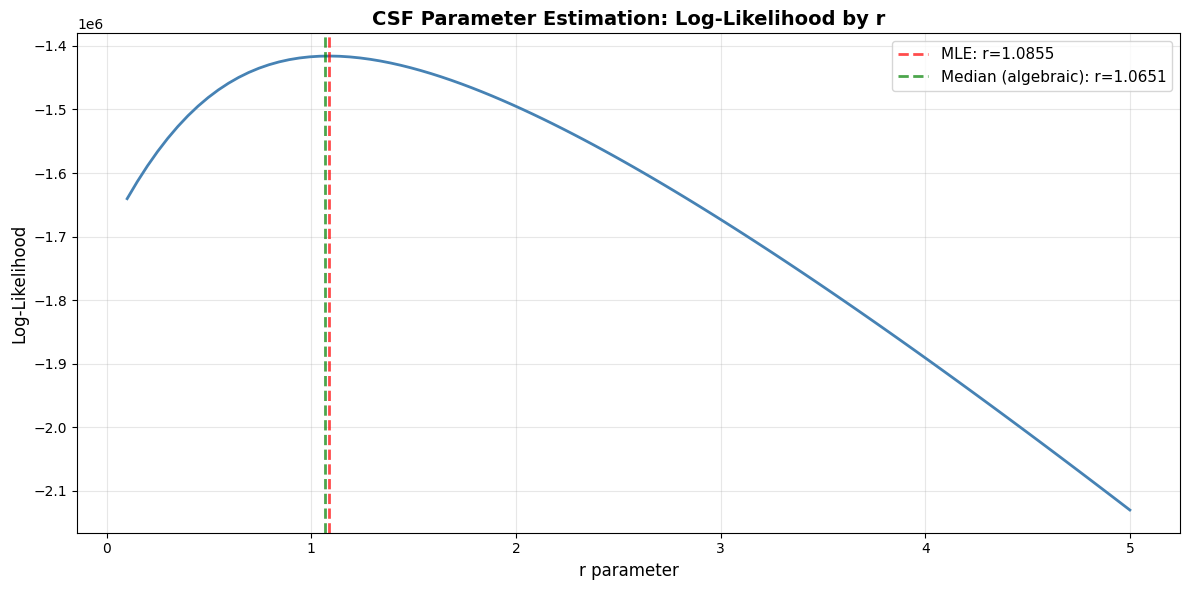



4️⃣ CSF Visualization with Estimated Parameters


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\325486464.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed_rates = csf_data.groupby('ratio_bin_plot').agg({


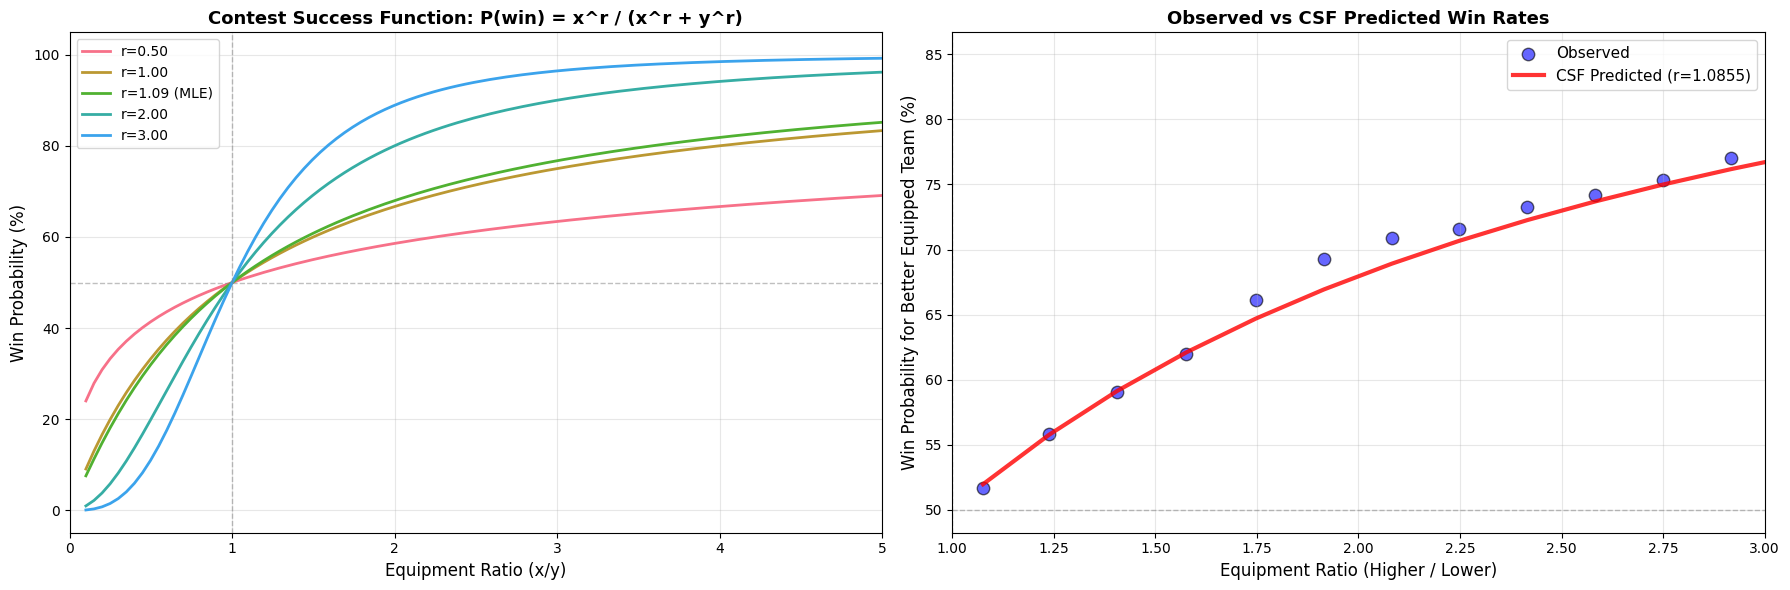



5️⃣ Model Fit Statistics

Model Performance (using r=1.0855):
  Accuracy:     66.15%
  Log Loss:     0.5769
  ROC-AUC:      0.6905

Prediction Errors:
  Mean Absolute Error: 0.3992
  RMSE:                0.4467


📊 SUMMARY: CSF PARAMETER (r) ESTIMATES

            Method  r value                       Notes
  Algebraic (Mean) 1.024578     Average from ratio bins
Algebraic (Median) 1.065078      Median from ratio bins
               MLE 1.085454 Maximum likelihood estimate
       Grid Search 1.089899    Validated by grid search


Percentile Distribution (Algebraic Method):
Percentile  r value
        1% 0.638837
       25% 1.004024
       50% 1.065078
       75% 1.106181
       99% 1.166541


🔑 INTERPRETATION FOR ABM

📌 RECOMMENDED r VALUE: 1.0855

What does this mean?
  • MODERATE r (0.5-1.5): Equipment advantage has MODERATE effect
  • Interpretation: Equipment matters, but not overwhelmingly
  • ABM implication: 2x equipment advantage → ~60-70% win probability

💡 PRACTICAL EXAMPLES

In [21]:
# Contest Success Function (CSF) Analysis - Estimate r parameter

print("🎯 Contest Success Function (CSF) Parameter Estimation")
print("="*70)
print("CSF Formula: P(win) = x^r / (x^r + y^r)")
print("Where: x = HIGHER equipment team, y = LOWER equipment team, r = intensity parameter")
print("Method: Calculate r from observed win rates at different equipment ratios")
print("="*70)

if 'econ_data' in globals() and econ_data is not None:
    
    # Prepare data for CSF analysis - ALWAYS use team with HIGHER equipment as x
    csf_data = econ_data[['t1_eq_val_total', 't2_eq_val_total', 'team1_winner']].copy()
    
    # Remove rows with zero or negative equipment (CSF requires positive values)
    csf_data = csf_data[(csf_data['t1_eq_val_total'] > 0) & (csf_data['t2_eq_val_total'] > 0)]
    
    # Calculate which team has higher equipment and create x (higher) and y (lower)
    csf_data['x_equipment'] = csf_data[['t1_eq_val_total', 't2_eq_val_total']].max(axis=1)
    csf_data['y_equipment'] = csf_data[['t1_eq_val_total', 't2_eq_val_total']].min(axis=1)
    csf_data['eq_ratio'] = csf_data['x_equipment'] / csf_data['y_equipment']
    
    # Determine if the team with HIGHER equipment won (this is our probability target)
    csf_data['better_equipped_team_won'] = (
        ((csf_data['t1_eq_val_total'] > csf_data['t2_eq_val_total']) & (csf_data['team1_winner'] == True)) |
        ((csf_data['t2_eq_val_total'] > csf_data['t1_eq_val_total']) & (csf_data['team1_winner'] == False))
    ).astype(int)
    
    # Remove ties (equal equipment)
    csf_data = csf_data[csf_data['x_equipment'] != csf_data['y_equipment']]
    
    print(f"\n📊 Data prepared: {len(csf_data):,} valid rounds")
    print(f"   Team with better equipment wins: {csf_data['better_equipped_team_won'].sum():,} ({csf_data['better_equipped_team_won'].mean()*100:.1f}%)")
    print(f"   Team with worse equipment wins: {(1-csf_data['better_equipped_team_won']).sum():,} ({(1-csf_data['better_equipped_team_won'].mean())*100:.1f}%)")
    
    # ========== METHOD 1: SOLVE FOR r ALGEBRAICALLY ==========
    print("\n\n1️⃣ Algebraic Method: Solving for r from equipment ratios")
    print("="*60)
    print("For each ratio bin, calculate average win rate for better-equipped team,")
    print("then solve for r that produces that win probability.")
    
    def estimate_r_from_ratio_and_winrate(ratio, observed_win_rate):
        """
        Estimate r from observed equipment ratio and win rate.
        For CSF: P = x^r / (x^r + y^r) where x/y = ratio
        
        Simplifying with ratio = x/y:
        P = ratio^r / (ratio^r + 1)
        
        Solving for r:
        P(ratio^r + 1) = ratio^r
        P*ratio^r + P = ratio^r
        P = ratio^r - P*ratio^r
        P = ratio^r(1 - P)
        ratio^r = P / (1 - P)
        r = ln(P / (1-P)) / ln(ratio)
        """
        if ratio <= 1.0 or observed_win_rate <= 0 or observed_win_rate >= 1.0:
            return np.nan
        
        try:
            odds = observed_win_rate / (1 - observed_win_rate)
            r_est = np.log(odds) / np.log(ratio)
            
            # Only return positive, reasonable r values
            if r_est > 0 and r_est < 50:
                return r_est
            else:
                return np.nan
        except:
            return np.nan
    
    # Group by equipment ratio bins and calculate average win rate for each
    # Create ratio bins for grouping
    ratio_bins = pd.cut(csf_data['eq_ratio'], bins=50)
    ratio_grouped = csf_data.groupby(ratio_bins).agg({
        'eq_ratio': 'mean',
        'better_equipped_team_won': 'mean',
        'x_equipment': 'count'
    }).dropna()
    
    ratio_grouped.columns = ['avg_ratio', 'win_rate', 'count']
    
    # Filter out bins with too few observations
    ratio_grouped = ratio_grouped[ratio_grouped['count'] >= 10]
    
    print(f"\n   Using {len(ratio_grouped)} ratio bins with 10+ observations each")
    
    # Calculate r for each ratio bin
    r_values = []
    for idx, row in ratio_grouped.iterrows():
        r_est = estimate_r_from_ratio_and_winrate(row['avg_ratio'], row['win_rate'])
        if not np.isnan(r_est):
            r_values.append(r_est)
    
    r_values = np.array(r_values)
    
    print(f"\n✅ Estimated r for {len(r_values):,} ratio bins")
    print(f"\nDistribution of r values (from ratio bins):")
    print(f"  Mean:   {np.mean(r_values):.4f}")
    print(f"  Median: {np.median(r_values):.4f}")
    print(f"  Std:    {np.std(r_values):.4f}")
    print(f"\nPercentiles:")
    print(f"  1%:     {np.percentile(r_values, 1):.4f}")
    print(f"  25%:    {np.percentile(r_values, 25):.4f}")
    print(f"  50%:    {np.percentile(r_values, 50):.4f}")
    print(f"  75%:    {np.percentile(r_values, 75):.4f}")
    print(f"  99%:    {np.percentile(r_values, 99):.4f}")
    
    # ========== METHOD 2: MAXIMUM LIKELIHOOD ESTIMATION ==========
    print("\n\n2️⃣ Maximum Likelihood Estimation (MLE) Method")
    print("="*60)
    print("Find the single best r that maximizes likelihood of observed outcomes")
    
    def csf_probability(x, y, r):
        """Calculate win probability using CSF"""
        return (x ** r) / ((x ** r) + (y ** r))
    
    def log_likelihood(r, x_vals, y_vals, outcomes):
        """
        Calculate log-likelihood for given r parameter.
        For each round: P(team1_wins) = x^r / (x^r + y^r)
        Log-likelihood = sum of log(P) for wins and log(1-P) for losses
        """
        if r <= 0:
            return -np.inf
        
        probs = csf_probability(x_vals, y_vals, r)
        
        # Clip probabilities to avoid log(0)
        probs = np.clip(probs, 1e-10, 1 - 1e-10)
        
        # Log-likelihood
        ll = np.sum(outcomes * np.log(probs) + (1 - outcomes) * np.log(1 - probs))
        
        return ll
    
    from scipy.optimize import minimize_scalar
    
    # Prepare arrays - use x (higher) and y (lower) equipment
    x_vals = csf_data['x_equipment'].values
    y_vals = csf_data['y_equipment'].values
    outcomes = csf_data['better_equipped_team_won'].values  # 1 if team with higher equipment won
    
    # Find optimal r by maximizing log-likelihood (minimizing negative log-likelihood)
    result = minimize_scalar(
        lambda r: -log_likelihood(r, x_vals, y_vals, outcomes),
        bounds=(0.1, 10.0),
        method='bounded'
    )
    
    r_mle = result.x
    
    print(f"\n✅ MLE Estimate: r = {r_mle:.4f}")
    print(f"   Log-likelihood: {-result.fun:.2f}")
    
    # ========== METHOD 3: GRID SEARCH FOR BEST r ==========
    print("\n\n3️⃣ Grid Search Method (Validation)")
    print("="*60)
    
    # Test range of r values
    r_test_values = np.linspace(0.1, 5.0, 100)
    log_likelihoods = [log_likelihood(r, x_vals, y_vals, outcomes) for r in r_test_values]
    
    best_idx = np.argmax(log_likelihoods)
    r_grid = r_test_values[best_idx]
    
    print(f"\n✅ Grid Search Best r: {r_grid:.4f}")
    
    # Plot log-likelihood curve
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(r_test_values, log_likelihoods, linewidth=2, color='steelblue')
    ax.axvline(x=r_mle, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'MLE: r={r_mle:.4f}')
    ax.axvline(x=np.median(r_values), color='green', linestyle='--', linewidth=2, alpha=0.7, 
              label=f'Median (algebraic): r={np.median(r_values):.4f}')
    ax.set_xlabel('r parameter', fontsize=12)
    ax.set_ylabel('Log-Likelihood', fontsize=12)
    ax.set_title('CSF Parameter Estimation: Log-Likelihood by r', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ========== VISUALIZE CSF WITH ESTIMATED r ==========
    print("\n\n4️⃣ CSF Visualization with Estimated Parameters")
    print("="*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot 1: CSF curves for different r values
    ax1 = axes[0]
    equipment_ratios = np.linspace(0.1, 10, 200)  # x/y ratio
    
    for r in [0.5, 1.0, r_mle, 2.0, 3.0]:
        probs = equipment_ratios**r / (equipment_ratios**r + 1)
        label = f'r={r:.2f}' + (' (MLE)' if abs(r - r_mle) < 0.01 else '')
        ax1.plot(equipment_ratios, probs * 100, linewidth=2, label=label)
    
    ax1.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax1.axvline(x=1, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax1.set_xlabel('Equipment Ratio (x/y)', fontsize=12)
    ax1.set_ylabel('Win Probability (%)', fontsize=12)
    ax1.set_title('Contest Success Function: P(win) = x^r / (x^r + y^r)', fontsize=13, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 5)
    
    # Plot 2: Observed vs Predicted with MLE r
    ax2 = axes[1]
    
    # Bin data by equipment ratio (already calculated)
    ratio_bins_plot = np.linspace(1.0, 5.0, 25)
    csf_data['ratio_bin_plot'] = pd.cut(csf_data['eq_ratio'], bins=ratio_bins_plot)
    
    observed_rates = csf_data.groupby('ratio_bin_plot').agg({
        'better_equipped_team_won': 'mean',
        'eq_ratio': 'mean'
    }).dropna()
    
    # Calculate predicted probabilities
    predicted_probs = csf_probability(observed_rates['eq_ratio'], 1.0, r_mle)
    
    # Plot observed vs predicted
    ax2.scatter(observed_rates['eq_ratio'], observed_rates['better_equipped_team_won'] * 100,
               s=80, alpha=0.6, color='blue', label='Observed', edgecolors='black', linewidth=1)
    ax2.plot(observed_rates['eq_ratio'], predicted_probs * 100,
            linewidth=3, color='red', label=f'CSF Predicted (r={r_mle:.4f})', alpha=0.8)
    ax2.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax2.axvline(x=1, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax2.set_xlabel('Equipment Ratio (Higher / Lower)', fontsize=12)
    ax2.set_ylabel('Win Probability for Better Equipped Team (%)', fontsize=12)
    ax2.set_title('Observed vs CSF Predicted Win Rates', fontsize=13, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(1.0, 3.0)
    
    plt.tight_layout()
    plt.show()
    
    # ========== MODEL FIT STATISTICS ==========
    print("\n\n5️⃣ Model Fit Statistics")
    print("="*60)
    
    # Calculate R² (pseudo R² for binary outcome)
    predicted_probs_all = csf_probability(x_vals, y_vals, r_mle)
    predicted_outcomes = (predicted_probs_all > 0.5).astype(int)
    
    from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
    
    accuracy = accuracy_score(outcomes, predicted_outcomes)
    logloss = log_loss(outcomes, predicted_probs_all)
    roc_auc = roc_auc_score(outcomes, predicted_probs_all)
    
    print(f"\nModel Performance (using r={r_mle:.4f}):")
    print(f"  Accuracy:     {accuracy*100:.2f}%")
    print(f"  Log Loss:     {logloss:.4f}")
    print(f"  ROC-AUC:      {roc_auc:.4f}")
    
    # Calculate prediction error
    pred_errors = np.abs(predicted_probs_all - outcomes)
    print(f"\nPrediction Errors:")
    print(f"  Mean Absolute Error: {np.mean(pred_errors):.4f}")
    print(f"  RMSE:                {np.sqrt(np.mean(pred_errors**2)):.4f}")
    
    # ========== SUMMARY TABLE ==========
    print("\n\n" + "="*70)
    print("📊 SUMMARY: CSF PARAMETER (r) ESTIMATES")
    print("="*70)
    
    summary_df = pd.DataFrame({
        'Method': ['Algebraic (Mean)', 'Algebraic (Median)', 'MLE', 'Grid Search'],
        'r value': [np.mean(r_values), np.median(r_values), r_mle, r_grid],
        'Notes': [
            'Average from ratio bins',
            'Median from ratio bins',
            'Maximum likelihood estimate',
            'Validated by grid search'
        ]
    })
    
    print("\n" + summary_df.to_string(index=False))
    
    print("\n\nPercentile Distribution (Algebraic Method):")
    percentile_df = pd.DataFrame({
        'Percentile': ['1%', '25%', '50%', '75%', '99%'],
        'r value': [
            np.percentile(r_values, 1),
            np.percentile(r_values, 25),
            np.percentile(r_values, 50),
            np.percentile(r_values, 75),
            np.percentile(r_values, 99)
        ]
    })
    print(percentile_df.to_string(index=False))
    
    # ========== INTERPRETATION ==========
    print("\n\n" + "="*70)
    print("🔑 INTERPRETATION FOR ABM")
    print("="*70)
    
    print(f"\n📌 RECOMMENDED r VALUE: {r_mle:.4f}")
    print("\nWhat does this mean?")
    
    if r_mle < 0.5:
        print("  • LOW r (<0.5): Equipment advantage has WEAK effect on win probability")
        print("  • Interpretation: Even large equipment differences produce small win rate changes")
        print("  • ABM implication: Other factors (skill, strategy) dominate over equipment")
    elif r_mle < 1.5:
        print("  • MODERATE r (0.5-1.5): Equipment advantage has MODERATE effect")
        print("  • Interpretation: Equipment matters, but not overwhelmingly")
        print("  • ABM implication: 2x equipment advantage → ~60-70% win probability")
    elif r_mle < 3.0:
        print("  • HIGH r (1.5-3.0): Equipment advantage has STRONG effect")
        print("  • Interpretation: Equipment differences strongly predict outcomes")
        print("  • ABM implication: 2x equipment advantage → ~75-85% win probability")
    else:
        print("  • VERY HIGH r (>3.0): Equipment advantage DOMINATES outcomes")
        print("  • Interpretation: Small equipment edges lead to near-certain wins")
        print("  • ABM implication: 2x equipment advantage → ~90%+ win probability")
    
    print(f"\n💡 PRACTICAL EXAMPLES (using r={r_mle:.4f}):")
    example_ratios = [1.0, 1.25, 1.5, 2.0, 3.0]
    for ratio in example_ratios:
        prob = csf_probability(ratio, 1.0, r_mle)
        print(f"   {ratio:.2f}x equipment advantage → {prob*100:.1f}% win probability")
    
    print("\n✅ Use this r value in your ABM's CSF: P(win) = x^r / (x^r + y^r)")
    print(f"   where x = team equipment, y = opponent equipment, r = {r_mle:.4f}")
    
    # Store results
    csf_results = {
        'r_mle': r_mle,
        'r_median': np.median(r_values),
        'r_mean': np.mean(r_values),
        'r_values_dist': r_values,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }
    
    print(f"\n✅ Results stored in 'csf_results' variable")
    
else:
    print("❌ No economic data available. Run previous cell first.")

🔍 Analyzing Round End Reasons and Bomb Events

📊 Querying round end reasons and bomb events...


C:\Users\peter\AppData\Local\Temp\ipykernel_35716\2671961094.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  end_reason_data = pd.read_sql(check_query, conn)



✅ Found 5 unique round end reasons
   Total rounds analyzed: 2,601,592

ROUND END REASONS & BOMB EVENTS

 round_end_reason  round_count  rounds_with_plant  rounds_with_defuse  rounds_with_plant_after_re  percentage  plant_rate  defuse_rate
                8       934538               2549                   0                          10       35.92        0.00         0.00
                9       863653             658893                   0                       59274       33.20        6.86         0.00
                1       398334             398172                   0                           0       15.31        0.00         0.00
                7       330404             330017              330177                           0       12.70        0.00        99.93
               12        74663               1872                   0                        1864        2.87        2.50         0.00

📈 SUMMARY STATISTICS

Bomb Events:
  Total rounds with bomb plant:  1,391,503 (53.5

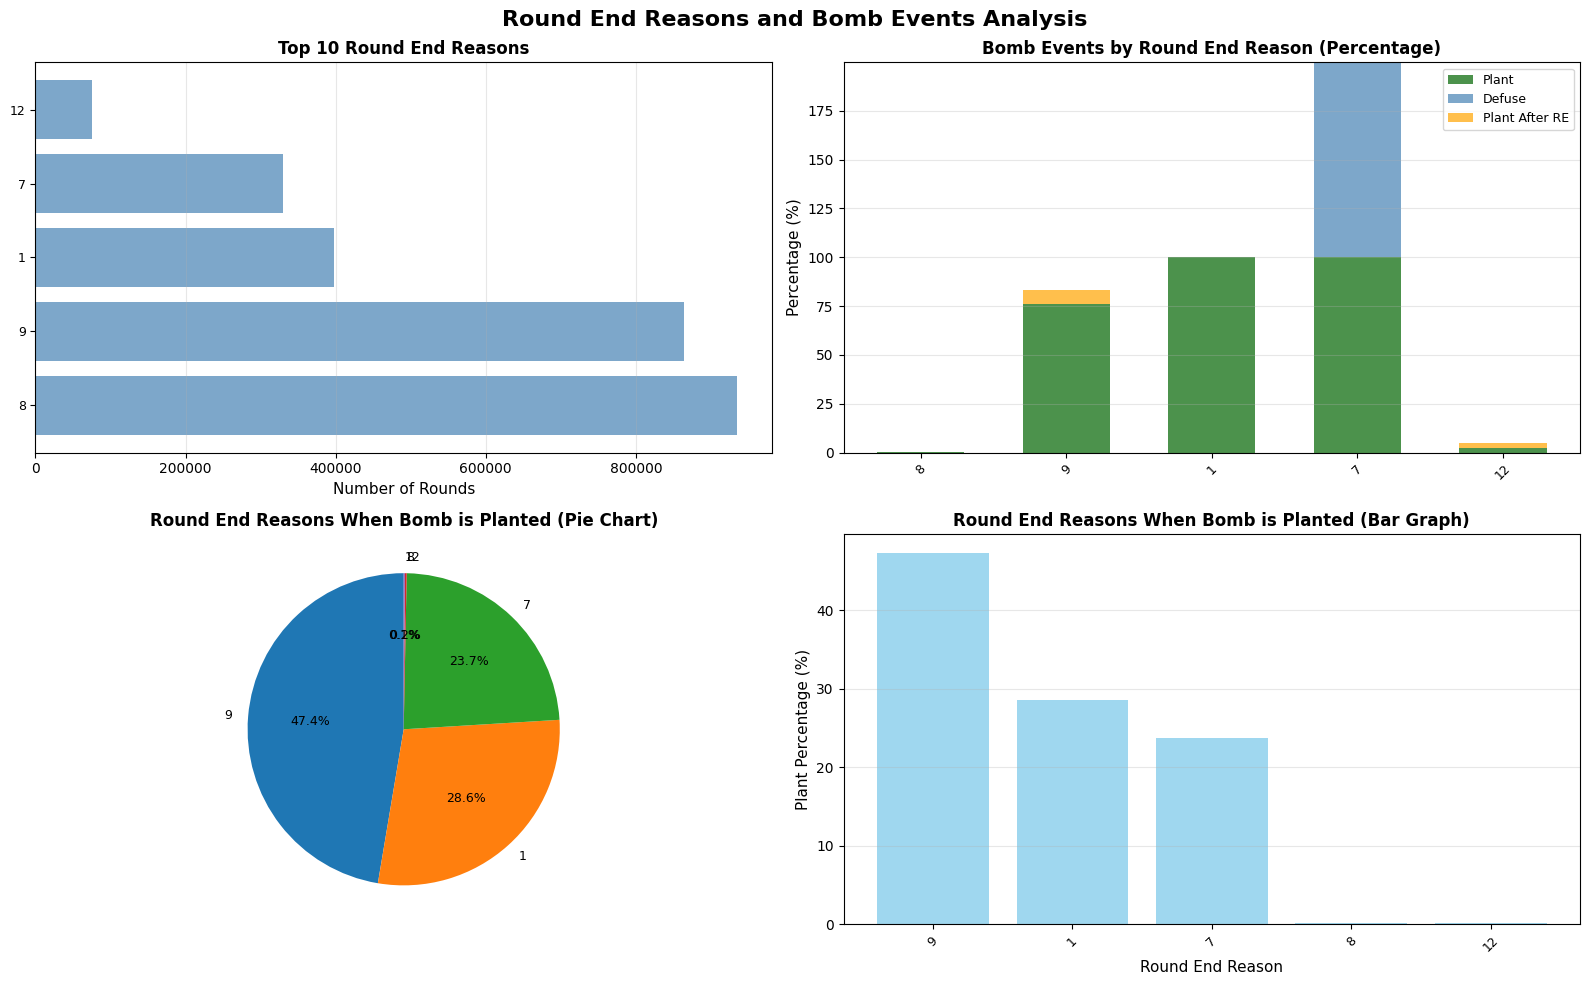


✅ Analysis complete!

💡 Key Findings:
   • Bomb is planted in 53.5% of rounds
   • When planted, bomb is defused in 23.7% of cases


In [35]:
# Check Round End Reasons and Bomb Plant Status

print("🔍 Analyzing Round End Reasons and Bomb Events")
print("="*70)

if conn:
    try:
        # Query to get round end reasons and bomb events
        check_query = """
       SELECT 
            r.round_end_reason,
            COUNT(*) as round_count,
            SUM(CASE WHEN EXISTS (
                SELECT 1 FROM bomb_events_round_ed b 
                WHERE b.round_id = r.id AND b.bomb_event_type = 0
            ) THEN 1 ELSE 0 END) as rounds_with_plant,
            SUM(CASE WHEN EXISTS (
                SELECT 1 FROM bomb_events_round_ed b 
                WHERE b.round_id = r.id AND b.bomb_event_type = 1
            ) THEN 1 ELSE 0 END) as rounds_with_defuse,
            SUM(CASE WHEN EXISTS (
                SELECT 1 FROM bomb_events_round_ed b 
                WHERE b.round_id = r.id AND b.bomb_event_type = 0 and b.after_re = true
            ) THEN 1 ELSE 0 END) as rounds_with_plant_after_re
        FROM rounds_ed r
        WHERE r.team1_winner IS NOT NULL
        GROUP BY r.round_end_reason
        ORDER BY round_count DESC
        """
        
        print("\n📊 Querying round end reasons and bomb events...")
        end_reason_data = pd.read_sql(check_query, conn)
        
        print(f"\n✅ Found {len(end_reason_data)} unique round end reasons")
        print(f"   Total rounds analyzed: {end_reason_data['round_count'].sum():,}")
        
        # Display the results
        print("\n" + "="*70)
        print("ROUND END REASONS & BOMB EVENTS")
        print("="*70)
        
        # Add percentage column
        total_rounds = end_reason_data['round_count'].sum()
        end_reason_data['percentage'] = (end_reason_data['round_count'] / total_rounds * 100).round(2)
        
        # Add plant rate per reason
        end_reason_data['plant_rate'] = (end_reason_data['rounds_with_plant'] / end_reason_data['round_count'] * 100).round(2)
        end_reason_data['defuse_rate'] = (end_reason_data['rounds_with_defuse'] / end_reason_data['round_count'] * 100).round(2)
        end_reason_data['plant_rate'] = (end_reason_data['rounds_with_plant_after_re'] / end_reason_data['round_count'] * 100).round(2)
        
        print("\n" + end_reason_data.to_string(index=False))
        
        # Summary statistics
        print("\n" + "="*70)
        print("📈 SUMMARY STATISTICS")
        print("="*70)
        
        total_plants = end_reason_data['rounds_with_plant'].sum()
        total_defuses = end_reason_data['rounds_with_defuse'].sum()
        total_plants_after = end_reason_data['rounds_with_plant_after_re'].sum()
        
        print(f"\nBomb Events:")
        print(f"  Total rounds with bomb plant:  {total_plants:,} ({total_plants/total_rounds*100:.1f}%)")
        print(f"  Total rounds with bomb defuse: {total_defuses:,} ({total_defuses/total_rounds*100:.1f}%)")
        print(f"  Total rounds with bomb defuse after RE: {total_plants_after:,} ({total_plants_after/total_rounds*100:.1f}%)")
        

        
        # Visualize the distribution
        print("\n📊 Creating visualization...")
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('Round End Reasons and Bomb Events Analysis', fontsize=16, fontweight='bold')

        # Plot 1: Top 10 round end reasons
        ax1 = axes[0, 0]
        top_reasons = end_reason_data.head(10)
        ax1.barh(range(len(top_reasons)), top_reasons['round_count'], color='steelblue', alpha=0.7)
        ax1.set_yticks(range(len(top_reasons)))
        ax1.set_yticklabels(top_reasons['round_end_reason'], fontsize=9)
        ax1.set_xlabel('Number of Rounds', fontsize=11)
        ax1.set_title('Top 10 Round End Reasons', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='x')

        ax2 = axes[0, 1]
        grouped_data = top_reasons[['round_end_reason', 'round_count', 'rounds_with_plant', 'rounds_with_defuse', 'rounds_with_plant_after_re']].copy()
        
        # Calculate percentages
        grouped_data['plant_percentage'] = (grouped_data['rounds_with_plant'] / grouped_data['round_count'] * 100).round(2)
        grouped_data['defuse_percentage'] = (grouped_data['rounds_with_defuse'] / grouped_data['round_count'] * 100).round(2)
        grouped_data['plant_after_re_percentage'] = (grouped_data['rounds_with_plant_after_re'] / grouped_data['round_count'] * 100).round(2)
        
        # Plot stacked bar chart
        bar_width = 0.6
        x = range(len(grouped_data))
        ax2.bar(x, grouped_data['plant_percentage'], bar_width, label='Plant', color='darkgreen', alpha=0.7)
        ax2.bar(x, grouped_data['defuse_percentage'], bar_width, bottom=grouped_data['plant_percentage'], label='Defuse', color='steelblue', alpha=0.7)
        ax2.bar(x, grouped_data['plant_after_re_percentage'], bar_width, 
            bottom=grouped_data['plant_percentage'] + grouped_data['defuse_percentage'], 
            label='Plant After RE', color='orange', alpha=0.7)
        
        # Customize the plot
        ax2.set_xticks(x)
        ax2.set_xticklabels(grouped_data['round_end_reason'], fontsize=9, rotation=45)
        ax2.set_ylabel('Percentage (%)', fontsize=11)
        ax2.set_title('Bomb Events by Round End Reason (Percentage)', fontsize=12, fontweight='bold')
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Plot 3: Pie chart for round end reasons when the bomb is planted
        ax3 = axes[1, 0]
        planted_data = end_reason_data[end_reason_data['rounds_with_plant'] > 0].copy()
        planted_data['plant_percentage'] = (planted_data['rounds_with_plant'] / total_plants * 100).round(2)

        # Sort data by plant percentage
        planted_data = planted_data.sort_values('plant_percentage', ascending=False)

        # Create pie chart
        ax3.pie(planted_data['plant_percentage'], labels=planted_data['round_end_reason'], 
            autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors, textprops={'fontsize': 9})
        ax3.set_title('Round End Reasons When Bomb is Planted (Pie Chart)', fontsize=12, fontweight='bold')

        # Plot 4: Bar graph for round end reasons when the bomb is planted
        ax4 = axes[1, 1]
        ax4.bar(planted_data['round_end_reason'].astype(str), planted_data['plant_percentage'], color='skyblue', alpha=0.8)
        ax4.set_xlabel('Round End Reason', fontsize=11)
        ax4.set_ylabel('Plant Percentage (%)', fontsize=11)
        ax4.set_title('Round End Reasons When Bomb is Planted (Bar Graph)', fontsize=12, fontweight='bold')
        ax4.tick_params(axis='x', rotation=45, labelsize=9)
        ax4.grid(True, alpha=0.3, axis='y')


        
        plt.tight_layout()
        plt.show()
        
        print("\n✅ Analysis complete!")
        print(f"\n💡 Key Findings:")
        print(f"   • Bomb is planted in {total_plants/total_rounds*100:.1f}% of rounds")
        print(f"   • When planted, bomb is defused in {total_defuses/total_plants*100:.1f}% of cases")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ No database connection. Run connection cell first.")
